In [84]:
import numpy as np

from tensorflow import keras
from bidict import bidict
from tensorflow.keras import layers
from tensorflow.keras import regularizers

from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle


In [2]:
ENCODER = bidict({'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8,
                  'I': 9, 'J': 10, 'K': 11, 'L': 12, 'M': 13, 'N': 14, 'O': 15, 'P': 16,
                  'Q': 17, 'R': 18, 'S': 19, 'T': 20, 'U': 21, 'V': 22, 'W': 23, 'X': 24,
                  'Y': 25, 'Z': 26})

In [3]:
keys = np.load('../data/keys.npy')
# converting to numbers as its better than string for ML
keys = np.array([ENCODER[x] for x in keys])
keys.shape

(130,)

In [4]:
imgs = np.load('../data/images.npy')
imgs = imgs.astype('float32') / 255
# imgs.shape
imgs[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

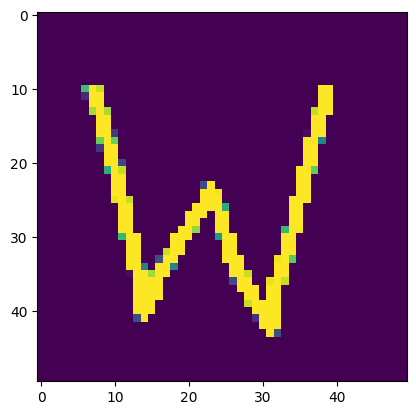

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
plt.imshow(imgs[4])
plt.grid(False)
plt.show()

In [6]:
imgs = np.expand_dims(imgs, -1)

In [11]:
keys, imgs = shuffle(keys, imgs)
split = .75

keys_train = keys[: int(len(keys) * split)]
keys_test = keys[int(len(keys) * split): ]

imgs_train = imgs[: int(len(imgs) * split)]
imgs_test = imgs[int(len(imgs) * split): ]


In [78]:
batch_size = 17
epochs = 30

model = keras.Sequential([
    keras.Input(shape=(50, 50, 1)),
    layers.Conv2D(32, kernel_size=3, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Dropout(0.2),
    layers.Conv2D(64, kernel_size=3, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(len(ENCODER)+1, activation='softmax')
])

In [79]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)
optimizer = keras.optimizers.Adam()

model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [83]:
model.fit(imgs_train, 
          keys_train, 
          batch_size=batch_size, 
          epochs=epochs, 
          validation_data=[imgs_test, keys_test],
          callbacks=[early_stop]
         )

# add more training data here to get 90% accuracy

Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 1.0000 - loss: 1.8841e-04 - val_accuracy: 0.7273 - val_loss: 2.0925
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 1.0000 - loss: 1.3878e-04 - val_accuracy: 0.7273 - val_loss: 2.0939
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 1.0000 - loss: 1.7434e-04 - val_accuracy: 0.7273 - val_loss: 2.0936


In [86]:
keys_predict = np.argmax(model.predict(imgs_test), axis=-1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


In [ ]:
cm = confusion_matrix(keys_test, keys_predict, labels=list(ENCODER.inverse.keys()))
cm

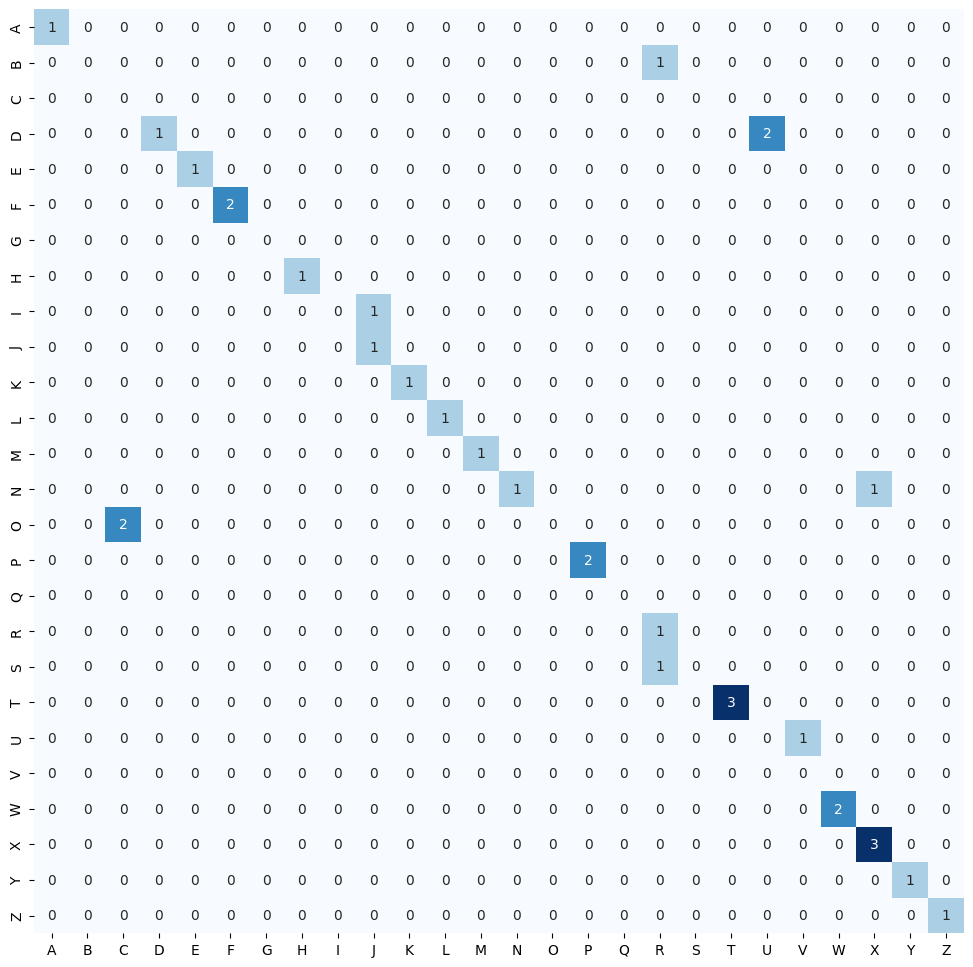

In [90]:
plt.figure(figsize=(12, 12))
sns.heatmap(cm, annot=True, cbar=False, cmap="Blues", xticklabels=list(ENCODER.keys()), yticklabels=list(ENCODER.keys()))
plt.show()

In [94]:
model.save('../alphabet.keras')